In [2]:
using Pkg; Pkg.add("DataFrames"); Pkg.add("Plots"); Pkg.add("Distributions"); Pkg.add("StatsPlots"); Pkg.add("CSV")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed Measures ────── v0.3.0
 Installed Showoff ─────── v0.3.1
 Installed FFMPEG ──────── v0.2.2
 Installed IterTools ───── v1.2.0
 Installed Plots ───────── v0.26.2
 Installed Contour ─────── v0.5.1
 Installed PlotThemes ──── v0.3.0
 Installed PlotUtils ───── v0.5.8
 Installed GeometryTypes ─ v0.7.5
 Installed GR ──────────── v0.41.0
  Updating `~/.julia/environments/v1.2/Project.toml`
  [91a5bcdd] + Plots v0.26.2
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [d38c429a] + Contour v0.5.1
  [c87230d0] + FFMPEG v0.2.2
  [28b8d3ca] + GR v0.41.0
  [4d00f742] + GeometryTypes v0.7.5
  [c8e1da08] + IterTools v1.2.0
  [442fdcdd] + Measures v0.3.0
  [ccf2f8ad] + Plot

In [3]:
using Random
using DataFrames
using Plots
using Distributions
using StatsPlots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1242


In [4]:
Random.seed!(0); 
df = DataFrame(x1=randn(1000), x2=randn(1000));
ρ = 0.8
df.x3 = ρ*df.x1 + √(1-ρ*ρ)*df.x2;

In [5]:
gr()

Plots.GRBackend()

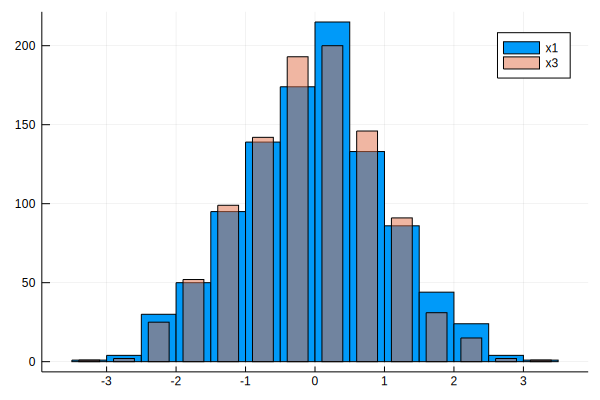

In [6]:
p = histogram(df.x1, nbins=25, labels="x1");
histogram!(p, df.x3, fillalpha=0.5, bar_width=0.3, labels="x3")

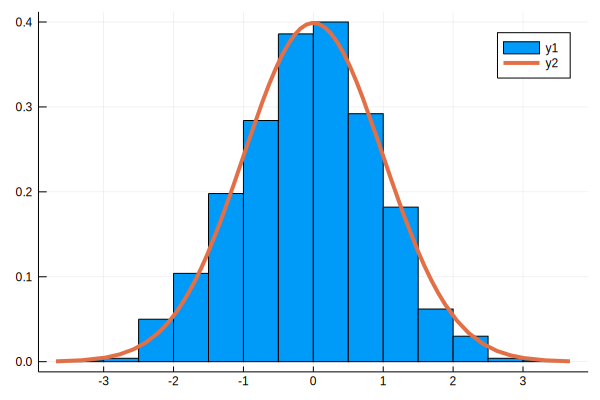

In [7]:
p = histogram(df.x3, normed=true)
plot!(p, Normal(0,1), width=4)

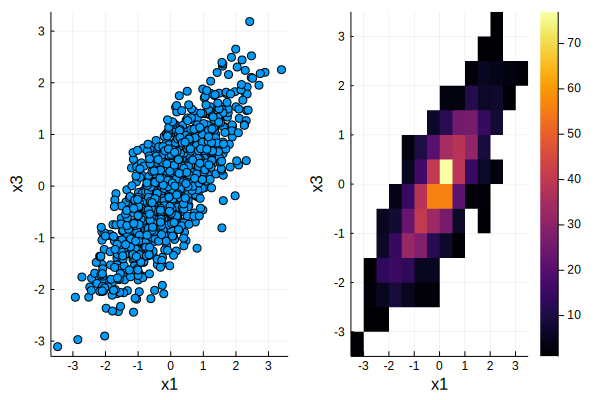

In [8]:
plot(scatter(df.x1, df.x3, legend=false), histogram2d(df.x1,df.x3),
    layout=Plots.GridLayout(1, 2), xlabel="x1", ylabel="x3" )

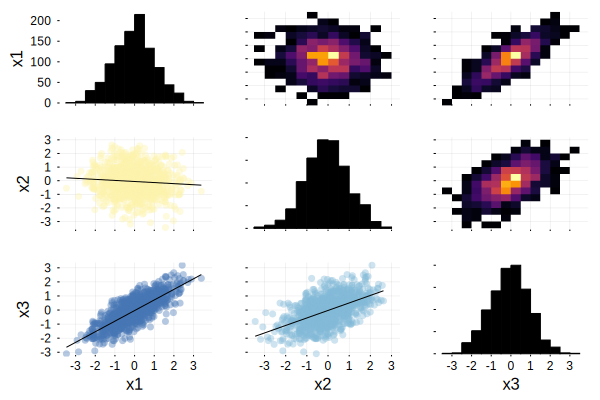

In [9]:
corrplot(convert(Matrix, df), bins=25, labels=["x1","x2","x3"])

In [10]:
using CSV
iris = CSV.read(joinpath(dirname(pathof(DataFrames)), "..", "docs/src/assets/iris.csv"));

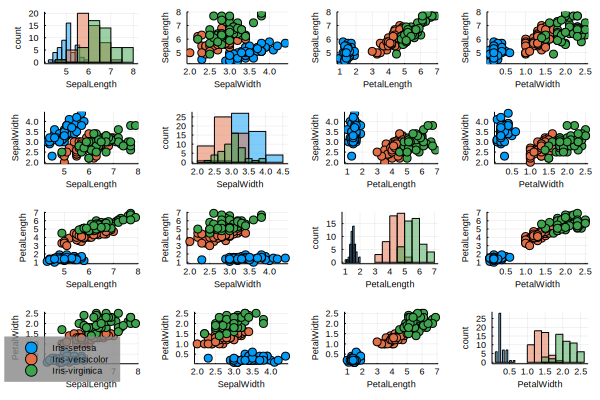

GKS: Colour is invalid in routine SET_COLOR_REP


In [11]:
font_h6 = Plots.font("Helvetica", 6)
plts = Plots.Plot[]
for i in 1:4, j in 1:4
    if i == j
        push!(plts, histogram(iris[!, i], group=iris[!, :Species],
            xlabel=names(iris)[j], ylabel="count",
            legend=false, fillalpha=0.5,
            guidefont=font_h6, tickfont=font_h6))
    else
        push!(plts, scatter(iris[!, j],iris[!, i],
            xlabel=names(iris)[j], ylabel=names(iris)[i],
            group=iris[!, :Species], legend=(i==4&&j==1),
            guidefont=font_h6, tickfont=font_h6, legendfont=font_h6,
            background_color_legend=RGBA(255,255,255,0.8),
            foreground_color_legend=nothing))
    end
end
p = plot(plts..., layout=Plots.GridLayout(4, 4))
